# Linear regression

Linear regression for the diabetes dataset.

## 1. Data preprocessing

In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
diabetes = load_diabetes()

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
df = pd.DataFrame(diabetes['data'],columns=diabetes['feature_names'])
df['target'] = diabetes['target']

In [6]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [8]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [9]:
corr_matrix = df.corr()
corr_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


Text(0.5, 1.0, 'Correlation Matrix')

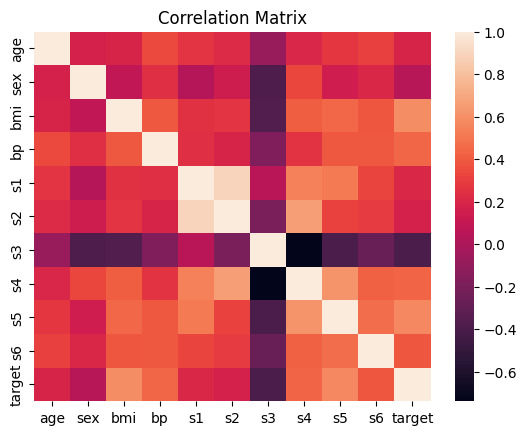

In [10]:
sns.heatmap(corr_matrix)
plt.title("Correlation Matrix")

In [11]:
corr_matrix['target'].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

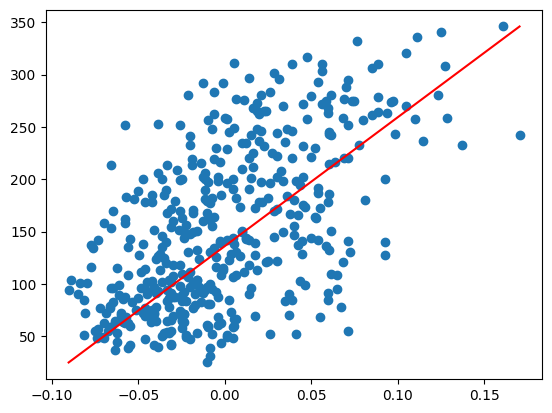

In [12]:
plt.scatter(df['bmi'], df['target'])
plt.plot(np.linspace(df['bmi'].min(), df['bmi'].max(), 100), np.linspace(df['target'].min(), df['target'].max(), 100), color='red')

In [34]:
# We only select the 4 features the most correlated to the target
X = df[['bmi', 's5', 'bp', 's4']].to_numpy()
y = diabetes['target'].reshape(-1,1)

In [35]:
print(X.shape, y.shape)

(442, 4) (442, 1)


In [36]:
X_new = np.zeros((X.shape[0], X.shape[1]+1))
X_new[:, 0] = np.ones(X.shape[0])
X_new[:,1:] = X

In [16]:
# Train, test slpit
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

## 2. Training functions

In [39]:
# Loss function: MSE
def loss_f(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)

In [40]:
# Linear regression prediction
def get_pred(X, A):
    return np.dot(X, A)

In [41]:
# Gradient of the MSE
def grad(Y, X, A):
    return -2/len(Y) * np.dot(X.T, Y - np.dot(X, A))

## 3. Training

In [135]:
# Learning rate
alpha = 0.1
# Iterations
n = 10000
# Initialize the parameters
A = np.zeros((X_train.shape[1],1))
# Training loss
losses = []

In [136]:
for k in range(n):
    A = A - alpha * grad(y_train, X_train, A)
    y_pred = get_pred(X_train, A)
    loss = loss_f(y_train, y_pred)
    losses.append(loss)
    print(f'Iteration {k+1}: MSE = {loss:.4f}')

Iteration 1: MSE = 21195.9205
Iteration 2: MSE = 15744.0070
Iteration 3: MSE = 12252.7246
Iteration 4: MSE = 10016.2466
Iteration 5: MSE = 8582.8451
Iteration 6: MSE = 7663.4153
Iteration 7: MSE = 7072.9305
Iteration 8: MSE = 6692.9741
Iteration 9: MSE = 6447.7596
Iteration 10: MSE = 6288.7839
Iteration 11: MSE = 6185.0049
Iteration 12: MSE = 6116.5559
Iteration 13: MSE = 6070.7221
Iteration 14: MSE = 6039.3662
Iteration 15: MSE = 6017.2802
Iteration 16: MSE = 6001.1311
Iteration 17: MSE = 5988.7856
Iteration 18: MSE = 5978.8785
Iteration 19: MSE = 5970.5362
Iteration 20: MSE = 5963.1993
Iteration 21: MSE = 5956.5099
Iteration 22: MSE = 5950.2391
Iteration 23: MSE = 5944.2402
Iteration 24: MSE = 5938.4193
Iteration 25: MSE = 5932.7164
Iteration 26: MSE = 5927.0930
Iteration 27: MSE = 5921.5246
Iteration 28: MSE = 5915.9954
Iteration 29: MSE = 5910.4952
Iteration 30: MSE = 5905.0176
Iteration 31: MSE = 5899.5584
Iteration 32: MSE = 5894.1151
Iteration 33: MSE = 5888.6858
Iteration 34: M

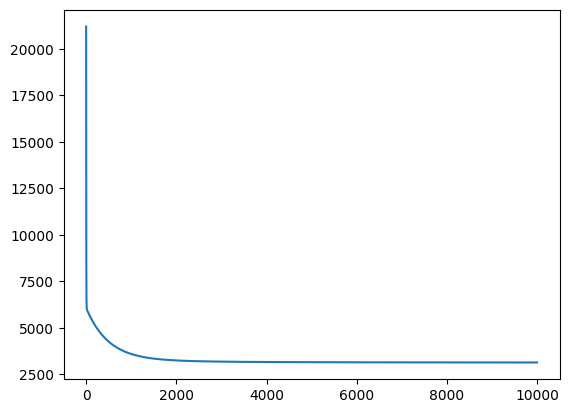

In [137]:
plt.plot(range(n), losses)

In [138]:
# Loss for the test set
loss_test = loss_f(get_pred(X_test, A), y_test)
# Metrics: MAE
mae_test = np.mean(abs(get_pred(X_test, A) - y_test))

print(f'Loss: {loss_test:.4f}')
print(f'MAE: {mae_test:.4f}')

Loss: 2908.3074
MAE: 44.4235


## 4. Comparison with scikit-learn

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
lr = LinearRegression()

In [141]:
lr.fit(X_train, y_train)

LinearRegression()

In [142]:
y_test_pred = lr.predict(X_test)

In [143]:
loss_test_sk = loss_f(y_test_pred, y_test)
mae_test_sk = np.mean(abs(y_test_pred - y_test))

print(f'Loss: {loss_test_sk:.4f}')
print(f'MAE: {mae_test_sk:.4f}')

Loss: 2900.2926
MAE: 44.3127


In [144]:
print(f'Loss difference between our model and scikit-learn model: {loss_test - loss_test_sk}')
print(f'MAE difference between our model and scikit-learn model: {mae_test - mae_test_sk}')

Loss difference between our model and scikit-learn model: 8.014806093608058
MAE difference between our model and scikit-learn model: 0.11082146125957593
